In [1]:
import tensorflow as tf
import numpy as np
import random as pr
import matplotlib.pyplot as plt
from gym.envs.registration import register
import gym

In [2]:
print(np.identity(16)[0:1])

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [3]:
print(np.identity(16))

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 

In [31]:
def one_hot(x):
    return np.identity(16)[x:x+1]

In [5]:
one_hot(16, 3)

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]])

In [28]:
env = gym.make('FrozenLake-v0')

[2017-09-07 21:07:54,576] Making new env: FrozenLake-v0


In [29]:
env.action_space

Discrete(4)

In [9]:
input_size = env.observation_space.n
output_size = env.action_space.n

In [43]:
# Hyperparameter
learning_rate = 0.1
dis = .99
num_episode = 2000
rList = list()

In [44]:
input_size, output_size

(16, 4)

In [45]:
X = tf.placeholder(shape=[1, input_size], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01))

Qpred = tf.matmul(X, W)
Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32) # Y label

loss = tf.reduce_sum(tf.square(Y - Qpred))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [46]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for episode in range(num_episode):
        s = env.reset()
        e = 1. / ((episode/50)+10)
        rAll = 0
        done = False
        local_loss = []
        while not done:
            # Choose an action by greedily (with e chance of random action) from the Q-network
            Qs = sess.run(Qpred, feed_dict={X: one_hot(s)})
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)
            
            s1, reward, done, _ = env.step(a)

            if done:
                Qs[0, a] = reward
            else:
                Qs1 = sess.run(Qpred, feed_dict={X: one_hot(s1)})
                Qs[0, a] = reward + dis * np.max(Qs1)
            sess.run(train, feed_dict={X: one_hot(s), Y:Qs})

            rAll += reward
            s = s1
        rList.append(rAll)

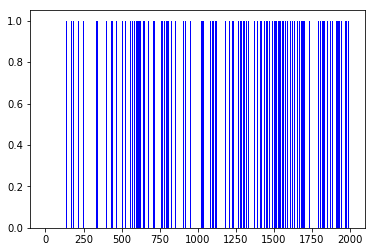

In [47]:
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

In [48]:
print("Success rate: " + str(sum(rList)/num_episode))
print("Final Q-Table Values")
print(Qs)

Success rate: 0.466
Final Q-Table Values
[[ 0.12448855  0.04913508  0.          0.07939348]]
